In [2]:
# Step 1: Load & Inspect the Dataset
import pandas as pd

# Load the heart disease dataset
heart_df = pd.read_csv("heart.csv")  # Ensure the file name is correct

# Display initial rows
print("\nSample Records:")
display(heart_df.head())

# Display structure and data types
print("\nDataset Structure:")
print(heart_df.info())

# Check for missing values
print("\nNull Value Check:")
print(heart_df.isnull().sum())

# Summary statistics
print("\nDescriptive Statistics:")
display(heart_df.describe())



Sample Records:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Null Value Check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
# Step 2: Data Cleaning
import numpy as np

# Initial missing value review
print("\nMissing Data (Initial Check):")
print(heart_df.isnull().sum())

# Replace non-numeric placeholders with NaN
heart_df.replace("?", np.nan, inplace=True)

# Convert object-type columns to numeric if needed
for column in heart_df.columns:
    if heart_df[column].dtype == 'object':
        heart_df[column] = pd.to_numeric(heart_df[column], errors='coerce')

# Check again for missing values
print("\nMissing Data (Post-Cleaning):")
print(heart_df.isnull().sum())

# Drop records with missing values
heart_df.dropna(inplace=True)

# Final data check
print(f"\nCleaned Data Shape: {heart_df.shape}")
print("Dataset cleaned and all values are numeric.")



Missing Data (Initial Check):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Missing Data (Post-Cleaning):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Cleaned Data Shape: (1025, 14)
Dataset cleaned and all values are numeric.


/tmp/ipython-input-4-1502711085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_df, x="target", palette="Set2")


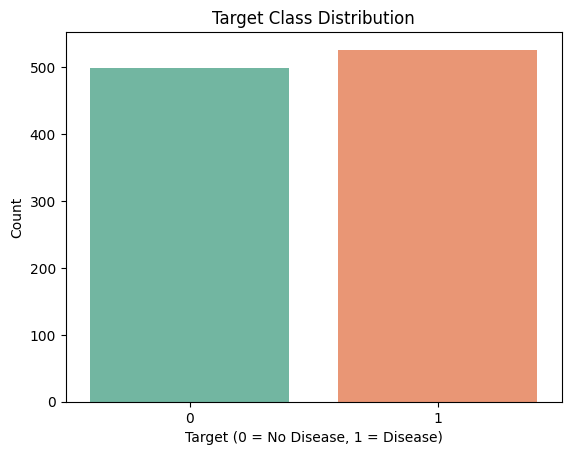

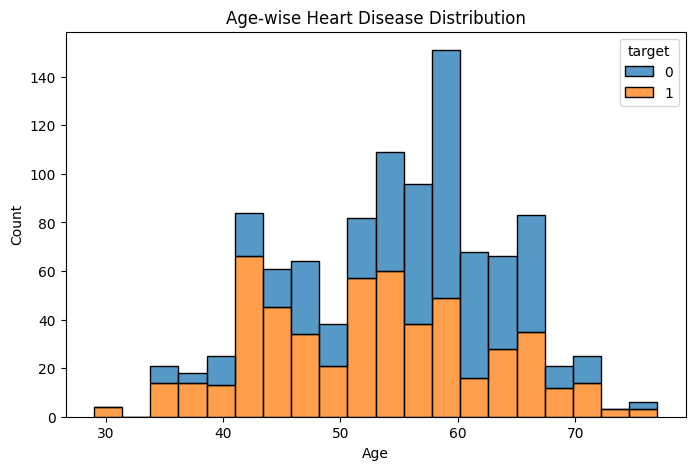

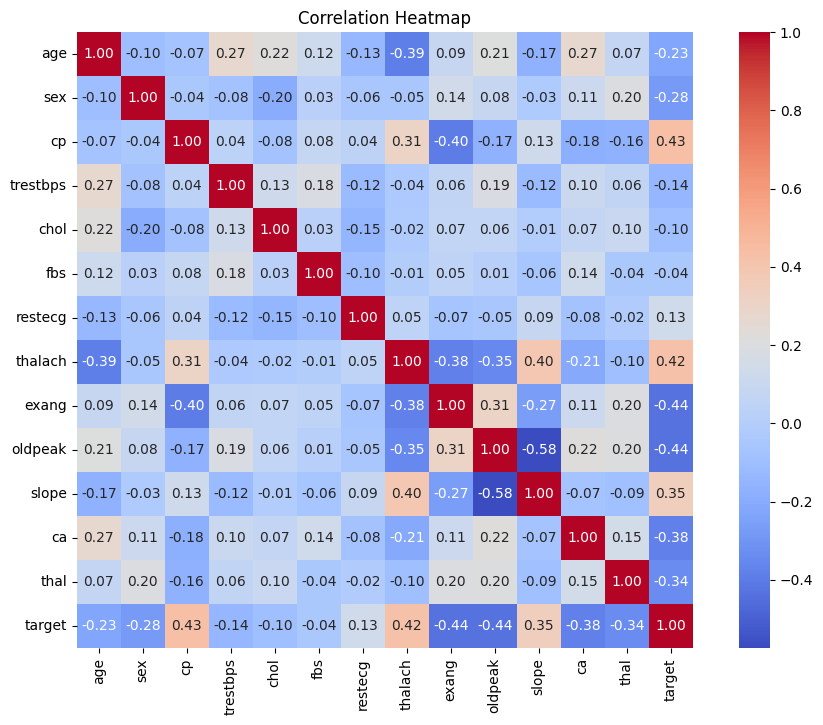

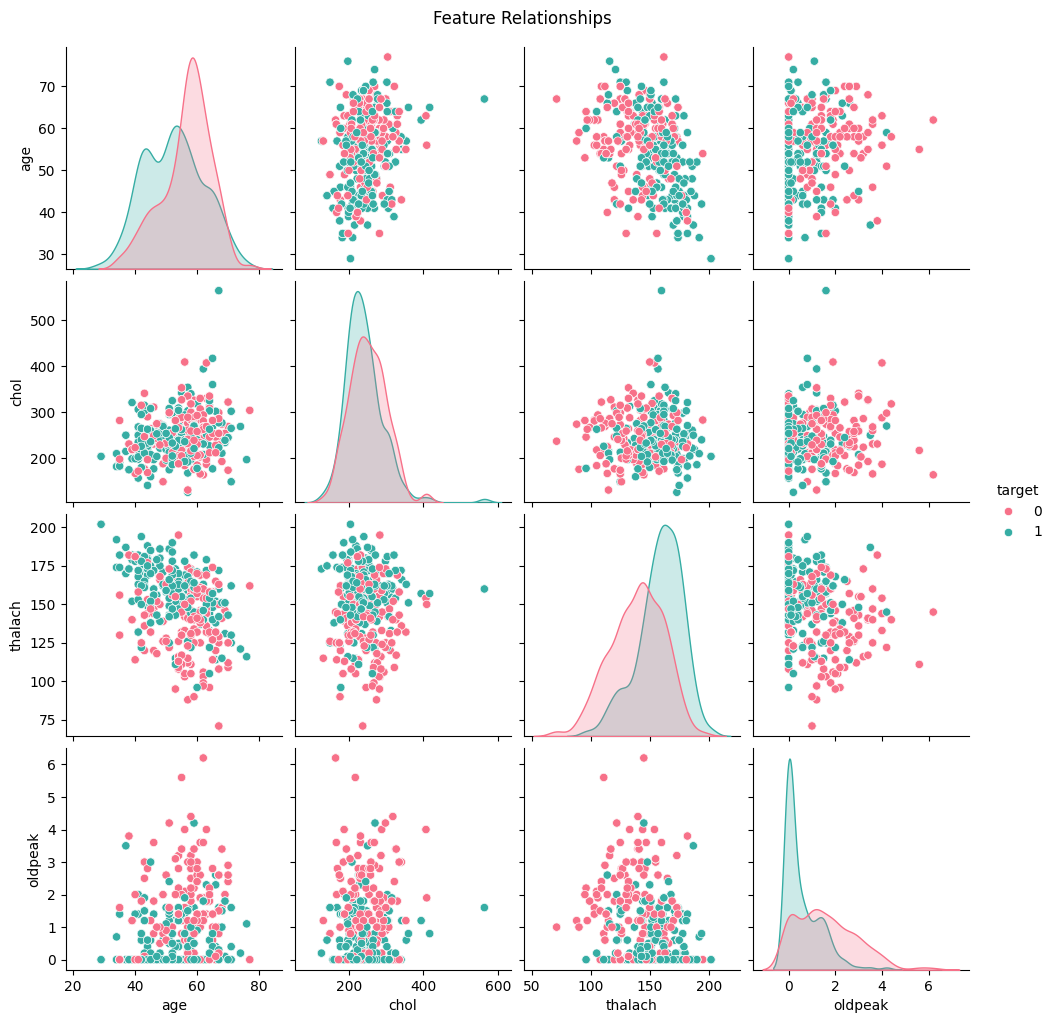

Model Accuracy: 0.7951


In [4]:
# Step 3: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3.1: Class Distribution
sns.countplot(data=heart_df, x="target", palette="Set2")
plt.title("Target Class Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Step 3.2: Age vs Heart Disease
plt.figure(figsize=(8, 5))
sns.histplot(data=heart_df, x='age', hue='target', multiple='stack', bins=20)
plt.title("Age-wise Heart Disease Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Step 3.3: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Step 3.4: Pair Plot (Partial Features)
sns.pairplot(heart_df[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette="husl")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Step 4: Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 4.1: Features and Target
X = heart_df.drop("target", axis=1)
y = heart_df["target"]

# Step 4.2: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4.3: Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4.4: Train Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Step 4.5: Accuracy
y_pred = logreg_model.predict(X_test_scaled)
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {model_accuracy:.4f}")


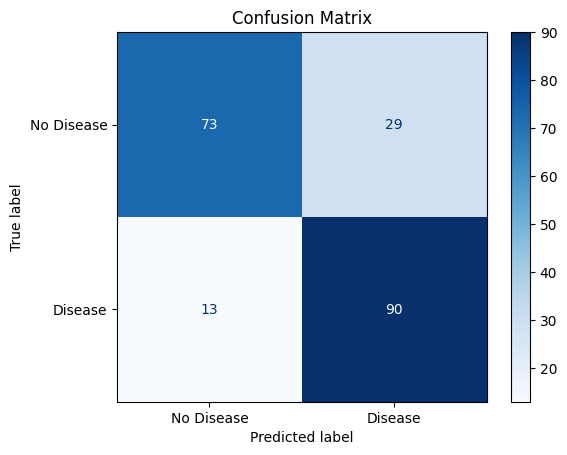


Classification Performance:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



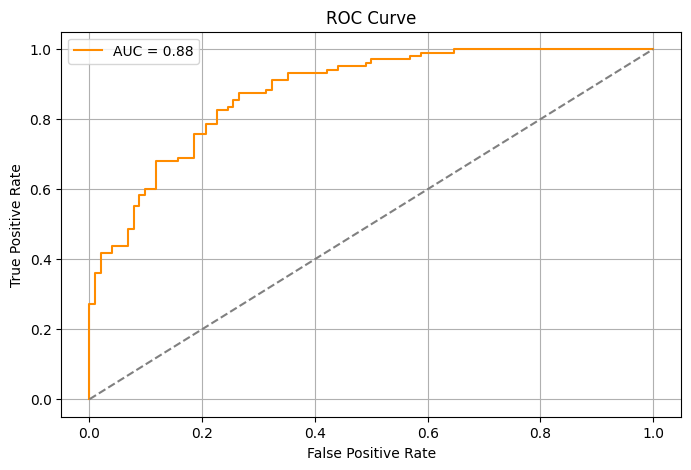

In [5]:
# Step 5: Evaluation
from sklearn.metrics import ConfusionMatrixDisplay

# Step 5.1: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Disease", "Disease"])
display_cm.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Step 5.2: Classification Report
print("\nClassification Performance:")
print(classification_report(y_test, y_pred))

# Step 5.3: ROC Curve
probabilities = logreg_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
auc_score = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Step 6: Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg_model.coef_[0],
    "Importance": abs(logreg_model.coef_[0])
}).sort_values(by="Importance", ascending=False)

print("\nTop Influential Features:")
display(feature_importance.head())



Top Influential Features:


,Feature,Coefficient,Importance
2,cp,0.885835,0.885835
11,ca,-0.847522,0.847522
1,sex,-0.835665,0.835665
9,oldpeak,-0.765406,0.765406
12,thal,-0.656856,0.656856


/tmp/ipython-input-7-1236863637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")


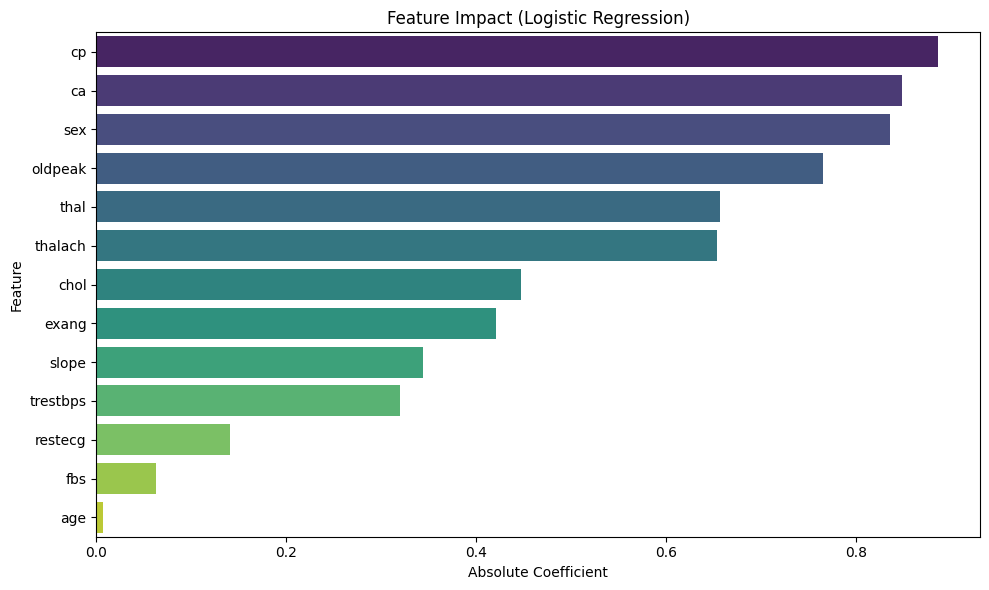

Final Accuracy: 0.7951
Final ROC-AUC: 0.8787


In [7]:
# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Impact (Logistic Regression)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 7.2: Final Score Summary
print(f"Final Accuracy: {model_accuracy:.4f}")
print(f"Final ROC-AUC: {auc_score:.4f}")


In [8]:
# Step 8: Make Prediction on New Patient
new_sample = pd.DataFrame([{
    'age': 54, 'sex': 1, 'cp': 0, 'trestbps': 130, 'chol': 250,
    'fbs': 0, 'restecg': 1, 'thalach': 150, 'exang': 0,
    'oldpeak': 1.5, 'slope': 2, 'ca': 0, 'thal': 2
}])

scaled_sample = scaler.transform(new_sample)
prediction = logreg_model.predict(scaled_sample)[0]
pred_prob = logreg_model.predict_proba(scaled_sample)[0][1]

if prediction == 1:
    print(f"Prediction: Risk of Heart Disease (Probability: {pred_prob:.2f})")
else:
    print(f"Prediction: Low Risk (Probability: {pred_prob:.2f})")


Prediction: Low Risk (Probability: 0.50)


In [9]:
# Step 9: Save and Reload Model
import joblib

# Save model and scaler
joblib.dump(logreg_model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Reload for future use
loaded_model = joblib.load("heart_disease_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example usage
example_scaled = loaded_scaler.transform(new_sample)
example_prediction = loaded_model.predict(example_scaled)
